# Classificação

A classificação baseada em vizinhos é um tipo de aprendizagem baseada em instância ou aprendizagem não generalizante: ela não tenta construir um modelo interno geral, mas simplesmente armazena instâncias dos dados de treinamento. A classificação é calculada a partir de uma votação de maioria simples dos vizinhos mais próximos de cada ponto: um ponto de consulta é atribuído à classe de dados que tem mais representantes nos vizinhos mais próximos do ponto.

*Neste exercício usaremos a biblioteca scikit-learn*

## Vertebrate Dataset
Cada vertebrado é classificado em uma das 5 categorias: mamíferos, répteis, aves, peixes e anfíbios, com base em um conjunto de atributos explicativos (variáveis preditoras). Exceto por "nome", o restante dos atributos foram convertidos em uma representação binária * one hot encoding *. 

#### Carregue os dados em um objeto Pandas DataFrame e exiba seu conteúdo.

In [50]:
import pandas as pd

In [51]:
DF = pd.read_csv('vertebrate.csv', na_values='?')

In [52]:
DF.head(10)

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [53]:
DF.shape

(15, 8)

In [54]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
Name                15 non-null object
Warm-blooded        15 non-null int64
Gives Birth         15 non-null int64
Aquatic Creature    15 non-null int64
Aerial Creature     15 non-null int64
Has Legs            15 non-null int64
Hibernates          15 non-null int64
Class               15 non-null object
dtypes: int64(6), object(2)
memory usage: 1.1+ KB


#### Dado o número limitado de exemplos de treinamento, suponha que convertamos o problema em uma tarefa de classificação binária (mamíferos versus não mamíferos). Podemos fazer isso substituindo os rótulos de classe das instâncias por *não mamíferos*, exceto aqueles que pertencem à classe de *mamíferos*. Faça isso na célula abaixo.

In [55]:
DF['Class'].replace(list(filter(lambda x: x != 'mammals', DF['Class'])), 'not-mammals', inplace=True)

In [56]:
DF.head()

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,not-mammals
2,salmon,0,0,1,0,0,0,not-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,not-mammals


Convertendo os valores categóricos, pois o algoritmo não está permitindo fazer o treinamento sem fazer essa conversão

In [57]:
DF = pd.get_dummies(DF, prefix=['Name'], columns=['Name'], drop_first=True)

Agora que a coluna Name foi substituida usando o get_dummies falta substituir os valores da coluna Class que serão atribuidos os valores 0 para mamiferos e 1 para não mamiferos

In [58]:
DF.replace('mammals', 0, inplace=True)
DF.replace('not-mammals', 1, inplace=True)

In [59]:
DF.shape

(15, 21)

In [60]:
DF.head()

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class,Name_cat,Name_eel,Name_frog,...,Name_komodo,Name_leopard shark,Name_penguin,Name_pigeon,Name_porcupine,Name_python,Name_salamander,Name_salmon,Name_turtle,Name_whale
0,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Utilize o método sklearn.model_selection.train_test_split para dividir o dataset em 70% dos dados para treino e 30% para teste.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
y = DF['Class'].values # passando os valores de Class para y

In [63]:
DF.drop('Class', axis=1, inplace=True) # decartando a coluna Class

In [64]:
X = DF.values

In [65]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [66]:
X_train.shape, X_test.shape

((10, 20), (5, 20))

A biblioteca *scikit-learn* implementa dois classificadores de vizinhos mais próximos diferentes: **KNeighborsClassifier** implementa o aprendizado com base nos vizinhos mais próximos de cada ponto de consulta, onde é um valor inteiro especificado pelo usuário. **RadiusNeighborsClassifier** implementa o aprendizado com base no número de vizinhos dentro de um raio fixo de cada ponto de treinamento, onde é um valor de ponto flutuante especificado pelo usuário.

#### Crie três classificadores  KNeighborsClassifier com os valores de  k = [5,10,15]

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
model1 = KNeighborsClassifier(n_neighbors=5) 
model2 = KNeighborsClassifier(n_neighbors=10)
model3 = KNeighborsClassifier(n_neighbors=15)

#### O códgo a seguir cria um classicador KNN com k = 5 e métrica minkowski de p igual a 2 (Observe os parâmetros). Faça o mesmo para os outros valores de k

In [69]:
class5 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [70]:
class10 = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
class15 = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)

#### Para treinar os classificadores utilize o método fit passando o dataset de treino

In [71]:
class5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
class10.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [73]:
class15.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

#### Utilize o método predict para calcular os valores preditos para o dataset de teste de cada classificador

In [74]:
y_pred5 = class5.predict(X_test)

In [75]:
y_pred10 = class10.predict(X_test)

In [76]:
#y_pred15 = class15.predict(X_test) # deu erro devido ao numero de vizinhos ser maior que o número de amostas 
                                    # passadas ao algortimo para o treinamento, amostas = 10, vizinhos = 15. 

#### O módulo cálcula diversas métricas de avaliação. Utilize os valores preditos para o dataset de teste e calcule a matriz de confusão e as métricas dadas pelo classification_report. Observe o resultado do classification_report. Qual foi o melhor valor de k?
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [77]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [78]:
cmatrix5 = confusion_matrix(y_test, y_pred5)
cmatrix5

array([[1, 0],
       [0, 4]])

In [79]:
cmatrix10 = confusion_matrix(y_test, y_pred10)
cmatrix10

array([[0, 1],
       [0, 4]])

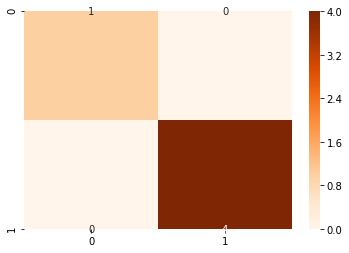

In [80]:
sns.heatmap(cmatrix5, annot=True, cmap="Oranges")

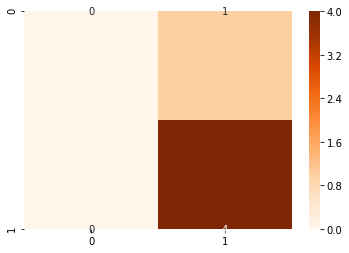

In [81]:
sns.heatmap(cmatrix10, annot=True, cmap="Oranges")

In [82]:
target_names = ['mammals', 'not-mammals']
print(classification_report(y_test, y_pred5, target_names=target_names))

              precision    recall  f1-score   support

     mammals       1.00      1.00      1.00         1
 not-mammals       1.00      1.00      1.00         4

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [83]:
target_names = ['mammals', 'not-mammals']
print(classification_report(y_test, y_pred10, target_names=target_names))

              precision    recall  f1-score   support

     mammals       0.00      0.00      0.00         1
 not-mammals       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/home/gil/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### O classificador com N=5 obteve um melhor resultado, baseando-se tanto na matriz deconfusão quanto na métricas

#### Escolha uma outra distância e repita o mesmo procedimento para a nova distância. 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

In [84]:
#limpando os valores das variáveis que serão reusadas
class5 = None
class10 = None
class15 = None
y_pred5 = None
y_pred10 = None
y_pred15 = None
cmatrix5 = None
cmatrix10 = None

In [85]:
class5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(X_train, y_train)

In [86]:
class10 = KNeighborsClassifier(n_neighbors=10, metric='euclidean').fit(X_train, y_train)

In [87]:
class15 = KNeighborsClassifier(n_neighbors=15, metric='euclidean').fit(X_train, y_train)

In [88]:
y_pred5 = class5.predict(X_test)
y_pred5

array([1, 1, 0, 1, 1])

In [89]:
y_pred10 = class10.predict(X_test)
y_pred10

array([1, 1, 1, 1, 1])

In [90]:
# y_pred15 = class15.predict(X_test) #como acontecido anteriormente, o número de vizinhos é maior que o número de amostras

In [91]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [92]:
cmatrix5 = confusion_matrix(y_test, y_pred5)
cmatrix5

array([[1, 0],
       [0, 4]])

In [93]:
cmatrix10 = confusion_matrix(y_test, y_pred10)
cmatrix10

array([[0, 1],
       [0, 4]])

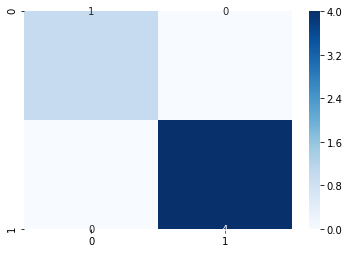

In [94]:
sns.heatmap(cmatrix5, annot=True, cmap="Blues")

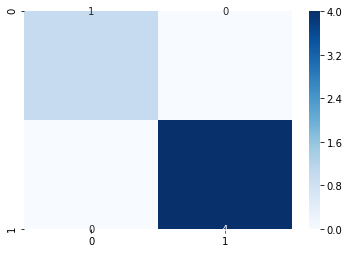

In [95]:
sns.heatmap(cmatrix5, annot=True, cmap="Blues")

In [96]:
target_names = ['mammals', 'not-mammals']
print(classification_report(y_test, y_pred5, target_names=target_names))

              precision    recall  f1-score   support

     mammals       1.00      1.00      1.00         1
 not-mammals       1.00      1.00      1.00         4

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [97]:
target_names = ['mammals', 'not-mammals']
print(classification_report(y_test, y_pred10, target_names=target_names))

              precision    recall  f1-score   support

     mammals       0.00      0.00      0.00         1
 not-mammals       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/home/gil/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Novamente o classificador com N=5 obteve um melhor resultado, baseando-se tanto na matriz deconfusão quanto na métricas